<h3>Recommended Grade of the Student</h3>

In [14]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as pyplot
import pickle
from matplotlib import style

In [15]:
data = pd.read_csv("student-mat.csv", sep=";")
data = data[["G1","G2","G3","studytime","failures","absences"]]
print(data.head())

   G1  G2  G3  studytime  failures  absences
0   5   6   6          2         0         6
1   5   5   6          2         0         4
2   7   8  10          2         3        10
3  15  14  15          3         0         2
4   6  10  10          2         0         4


In [16]:
predict = "G3"

#training
X = np.array(data.drop(columns=[predict]))
#assume
y = np.array(data[[predict]])

In [17]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2)

In [18]:
best = 0 
for i in range(30):
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2)
    linear = linear_model.LinearRegression()
    linear.fit(X_train, y_train)

    #Measuring the accuracy
    acc = linear.score(X_test, y_test)
    #print(acc)
    
    if acc > best:
        best = acc
        with open ("student.pickle", "wb") as f:
            pickle.dump(linear, f)

pickle_in = open ("student.pickle", "rb")
linear = pickle.load(pickle_in)

In [19]:
predict = linear.predict(X_test)
for i in range(len(predict)):
    print(predict[i], X_test[i], y_test[i])

[8.83580325] [11  9  3  0 10] [10]
[16.19755083] [14 16  1  0  3] [16]
[9.57953694] [10 10  2  0  4] [11]
[12.59361346] [11 13  2  0  2] [14]
[14.92116251] [15 15  3  0  0] [15]
[14.61670972] [13 15  3  0  0] [15]
[3.62387789] [7 5 3 1 0] [0]
[11.91013227] [14 12  4  0  6] [13]
[12.03687386] [10 12  2  0 16] [11]
[10.71013893] [11 11  1  0  0] [10]
[7.23591742] [ 8  8  4  0 10] [8]
[9.10069472] [ 9 10  3  0  0] [0]
[12.76800289] [10 13  1  0  6] [13]
[15.6472513] [16 15  2  0 10] [15]
[4.92886932] [7 6 1 1 0] [0]
[15.63160036] [17 15  1  0  2] [15]
[15.750358] [14 16  3  0  0] [16]
[10.63076969] [11 11  2  0  2] [11]
[8.4966548] [8 9 1 0 5] [9]
[8.29061598] [8 9 1 0 0] [8]
[11.87342701] [15 12  2  1  0] [12]
[12.66342433] [12 13  2  0  0] [14]
[9.27203787] [ 8 10  1  0  0] [11]
[15.3175892] [16 15  2  0  2] [15]
[3.26471181] [6 5 1 3 0] [0]
[10.38656939] [11 11  3  0  0] [10]
[13.24033301] [12 13  2  0 14] [12]
[6.87711448] [ 9  7  2  1 20] [8]
[12.68558736] [10 13  1  0  4] [14]
[9.09

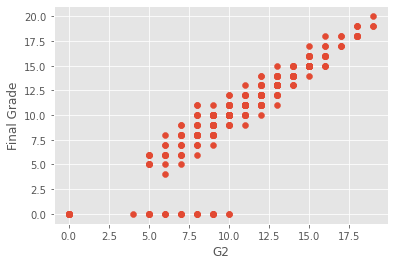

In [20]:
p= "G2"

style.use("ggplot")
pyplot.scatter(data[p], data["G3"])
pyplot.xlabel(p)
pyplot.ylabel("Final Grade")
pyplot.show()